# Skincare Recommender System

## 1. Imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [61]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\ML2\cosmetics.csv")

In [62]:
df.head(10)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1
6,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0
7,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0
8,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1
9,Moisturizer,LA MER,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",0,0,0,0,0


In [63]:
df.sample(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
745,Treatment,ORIGINS,Dr. Andrew Weil For Origins™ Mega-Mushroom Rel...,56,4.1,"Water, Simmondsia Chinensis (Jojoba) Seed Oil,...",1,1,1,1,1
896,Face Mask,TATCHA,Luminous Deep Hydration Lifting Mask,95,4.5,"Water, Glycerin, Propanediol, Methyl Gluceth-¬...",1,1,1,1,1
608,Treatment,MURAD,Rapid Age Spot and Pigment Lightening Serum,69,3.8,"Water, Alcohol Denat., Glycolic Acid, Butylene...",1,1,1,1,0
368,Cleanser,MURAD,AHA/BHA Exfoliating Cleanser,39,4.6,"Water, Sodium Laureth Sulfate, Cocamidopropyl ...",0,0,0,0,0
902,Face Mask,KIEHL'S SINCE 1851,Ginger Leaf & Hibiscus Firming Mask,54,4.4,"Water, PVP, Propanediol, Behenyl Alcohol, Capr...",1,1,1,1,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [65]:
df.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [66]:
df.columns

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [67]:
df.isnull().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [68]:
df[df.duplicated()]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive


In [69]:
df.shape

(1472, 11)

#### Total Brand Names

In [70]:
df['Brand'].unique()

array(['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
       "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
       'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
       'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN',
       'FARSÁLI', 'LANEIGE', 'DR. JART+', 'GLOW RECIPE', 'HERBIVORE',
       'TARTE', 'CAUDALIE', 'YOUTH TO THE PEOPLE', 'BIOSSANCE',
       'ESTÉE LAUDER', 'SON & PARK', 'AMOREPACIFIC', 'BOBBI BROWN',
       'ERBORIAN', 'SMASHBOX', 'GLAMGLOW', 'PETER THOMAS ROTH',
       'JACK BLACK', 'PHILOSOPHY', 'PERRICONE MD', 'LANCÔME', 'ALGENIST',
       'MAKE UP FOR EVER', 'KORRES', 'MURAD', 'GUERLAIN', 'DIOR',
       'KORA ORGANICS', 'DR. DENNIS GROSS SKINCARE', 'REN CLEAN SKINCARE',
       'KOPARI', 'CLARINS', 'NURSE JAMIE', 'LANCER', "L'OCCITANE",
       'KATE SOMERVILLE', 'SUPERGOOP!', 'SATURDAY SKIN',
       'SEPHORA COLLECTION', 'MILK MAKEUP', 'DR. BRANDT SKINCARE',
       'J.ONE', 'KAT VON D', 'TATA HARPER', 'GO

In [71]:
df['Brand'].value_counts()

Brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
                      ..
TOM FORD               1
KAPLAN MD              1
BLACK UP               1
URBAN DECAY            1
DERMAFLASH             1
Name: count, Length: 116, dtype: int64

In [72]:
total_brands_count = len(df["Brand"].unique())
total_brands_count

116

In [73]:
df['Label'].unique()

array(['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream',
       'Sun protect'], dtype=object)

In [74]:
total_Labels_count = len(df["Label"].unique())
total_Labels_count

6

In [75]:
max_price_brand = df.loc[df["Price"].idxmax(), "Brand"]
print("Brand with the highest price:", max_price_brand)

Brand with the highest price: LA MER


In [76]:
max_price_Label = df.loc[df["Price"].idxmax(), "Label"]
print("Label with the highest price:", max_price_Label)

Label with the highest price: Treatment


In [77]:
print("Brand with the highest rating:", df.loc[df["Rank"].idxmax(), "Brand"])

Brand with the highest rating: LA MER


In [78]:
all_skin_types_count = df[(df["Combination"] == 1) & 
                          (df["Dry"] == 1) & 
                          (df["Normal"] == 1) & 
                          (df["Oily"] == 1) & 
                          (df["Sensitive"] == 1)]["Brand"].nunique()

print("Number of brands suitable for all skin types:", all_skin_types_count)

Number of brands suitable for all skin types: 91


In [79]:
top_5_highest_rank_brands = df.sort_values(by="Rank", ascending=False).head(5)["Brand"]
print("Top 5 highest-ranked brands:", top_5_highest_rank_brands.tolist())

Top 5 highest-ranked brands: ['LA MER', 'COOLA', 'SHISEIDO', 'BIOEFFECT', 'CLARISONIC']


## 2. EDA

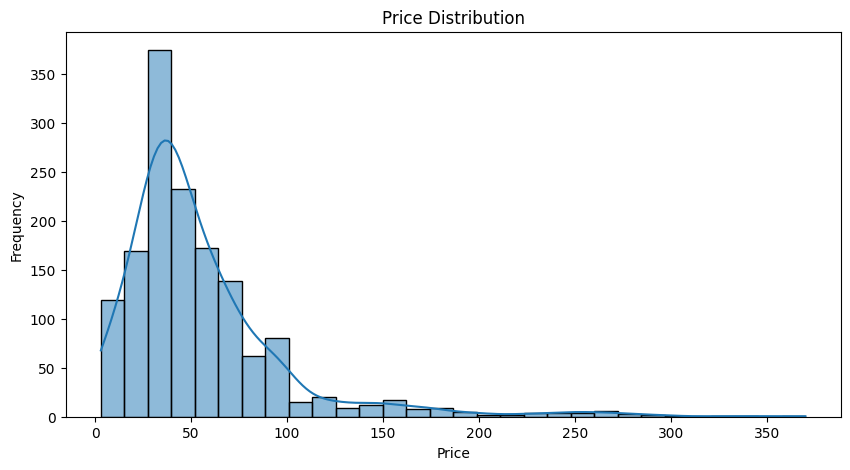

In [80]:
# Plot the distribution of prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Prices are skewed, with a peak at the lower end, suggesting many products are relatively affordable

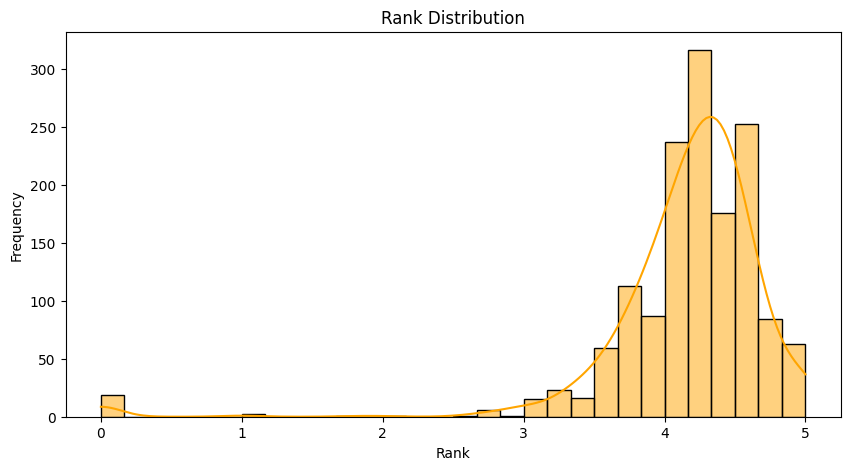

In [81]:
# Plot the distribution of ranks
plt.figure(figsize=(10, 5))
sns.histplot(df['Rank'], bins=30, kde=True, color="orange")
plt.title('Rank Distribution')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

The ratings are fairly concentrated around the middle to high range, indicating generally well-reviewed products.

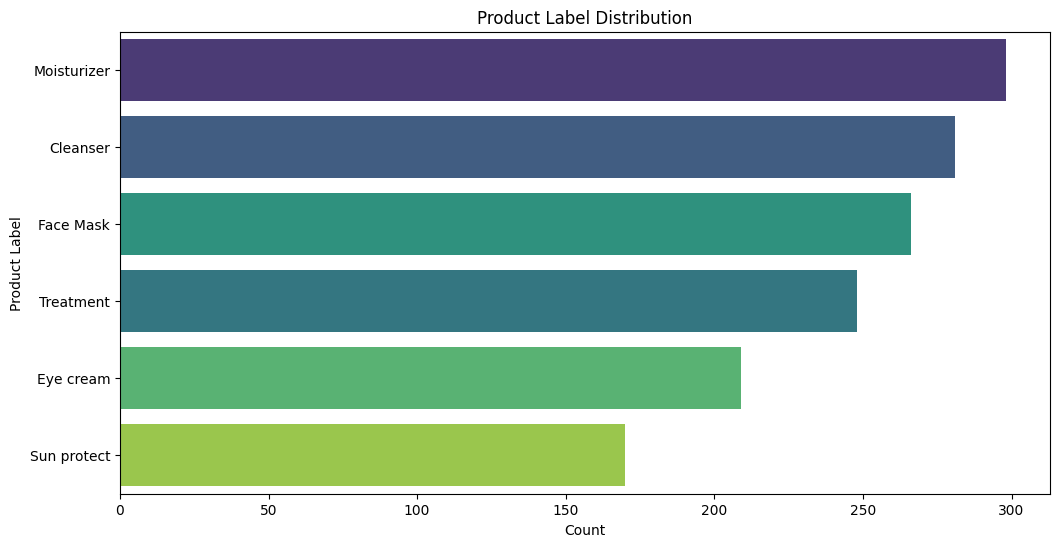

In [82]:
# Count plot for product labels (categories)
plt.figure(figsize=(12, 6))
sns.countplot(y = df['Label'],hue=df['Label'], order=df['Label'].value_counts().index, palette="viridis",legend=False)
plt.title('Product Label Distribution')
plt.xlabel('Count')
plt.ylabel('Product Label')
plt.show()

 Certain product types dominate the dataset, with "Moisturizer" and "Cleanser" being the most frequent.

## Data Preprocessing

#### Tokenization

In [83]:
# import library for tokenization
from nltk.tokenize import word_tokenize

In [84]:
#Preparing the 'Ingredients' column for feature extraction


df['features'] = df['Ingredients'].apply(word_tokenize)

In [85]:
df['tokenized_ingredients'] = df['Ingredients'].apply(lambda x: x.lower().split(", "))

In [86]:
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,features,tokenized_ingredients
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,"[Algae, (, Seaweed, ), Extract, ,, Mineral, Oi...","[algae (seaweed) extract, mineral oil, petrola..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,"[Galactomyces, Ferment, Filtrate, (, Pitera, )...","[galactomyces ferment filtrate (pitera), butyl..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,"[Water, ,, Dicaprylyl, Carbonate, ,, Glycerin,...","[water, dicaprylyl carbonate, glycerin, cetear..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,"[Algae, (, Seaweed, ), Extract, ,, Cyclopentas...","[algae (seaweed) extract, cyclopentasiloxane, ..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,"[Water, ,, Snail, Secretion, Filtrate, ,, Phen...","[water, snail secretion filtrate, phenyl trime..."


In [87]:
# Create a dictionary with unique ingredients

# Flatten all tokenized ingredients into a single list
all_ingredients = [ingredient for sublist in df['tokenized_ingredients'] for ingredient in sublist]

# Create a unique list of ingredients and assign an index to each
unique_ingredients = list(set(all_ingredients))
ingredient_idx = {ingredient: index for index, ingredient in enumerate(unique_ingredients)}


In [88]:
ingredient_idx

{'': 0,
 'acetyl tetrapeptide-9': 1,
 'sodium palmitoyl proline ': 2,
 'rosa spp/rose flower oil': 3,
 'peg 8-dimethicone': 4,
 'dandelion leaf': 5,
 'propylene glycol dicaprylate/dicaprate': 6,
 'kigelia africanafruit extract': 7,
 'aristotelia chilensis (maqui berry) fruit juice': 8,
 '1,2 hexanediol': 9,
 'melia azadirachta flower extract.': 10,
 'morinda citrifolia (noni) fruit extract': 11,
 'stearic acid**': 12,
 'ocimum sanctum (holy basil) leaf extract': 13,
 'linalool*': 14,
 'averrhoa carambola fruit extract': 15,
 'fragrance*': 16,
 'calendula officinalis (pot marigold) flower extract': 17,
 'tocopherol. the bubble mask: water': 18,
 'linolenic acid. .': 19,
 'copper lysinate/prolinate': 20,
 'polyglyceryl-2 oleate': 21,
 'cetyl alcohol (emollient - non-drying fatty alcohol from coconut oil)': 22,
 'methylpropional.': 23,
 'tetrasodium edta. maycontain: mica': 24,
 '-pearl extract -niacinamide': 25,
 'curcuma longa root extract/turmeric root extract': 26,
 'octisalate 5.00% 

#### Creating a binary bag-of-words

In [89]:
import numpy as np

# Initialize a matrix of zeros with dimensions [num_products, num_unique_ingredients]
num_products = len(df)
num_ingredients = len(unique_ingredients)
bag_of_words_matrix = np.zeros((num_products, num_ingredients), dtype=int)

# Fill the matrix based on the presence of each ingredient in each product
for i, ingredients in enumerate(df['tokenized_ingredients']):
    for ingredient in ingredients:
        if ingredient in ingredient_idx:
            bag_of_words_matrix[i, ingredient_idx[ingredient]] = 1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Label                  1472 non-null   object 
 1   Brand                  1472 non-null   object 
 2   Name                   1472 non-null   object 
 3   Price                  1472 non-null   int64  
 4   Rank                   1472 non-null   float64
 5   Ingredients            1472 non-null   object 
 6   Combination            1472 non-null   int64  
 7   Dry                    1472 non-null   int64  
 8   Normal                 1472 non-null   int64  
 9   Oily                   1472 non-null   int64  
 10  Sensitive              1472 non-null   int64  
 11  features               1472 non-null   object 
 12  tokenized_ingredients  1472 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 149.6+ KB


In [91]:
df = df.reset_index()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  1472 non-null   int64  
 1   Label                  1472 non-null   object 
 2   Brand                  1472 non-null   object 
 3   Name                   1472 non-null   object 
 4   Price                  1472 non-null   int64  
 5   Rank                   1472 non-null   float64
 6   Ingredients            1472 non-null   object 
 7   Combination            1472 non-null   int64  
 8   Dry                    1472 non-null   int64  
 9   Normal                 1472 non-null   int64  
 10  Oily                   1472 non-null   int64  
 11  Sensitive              1472 non-null   int64  
 12  features               1472 non-null   object 
 13  tokenized_ingredients  1472 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 161.1+ 

In [93]:
# Convert to DataFrame with ingredient names as column headers

bow_df = pd.DataFrame(bag_of_words_matrix, columns=unique_ingredients, index=df['index'])


In [94]:
bow_df

,,acetyl tetrapeptide-9,sodium palmitoyl proline,rosa spp/rose flower oil,peg 8-dimethicone,dandelion leaf,propylene glycol dicaprylate/dicaprate,kigelia africanafruit extract,aristotelia chilensis (maqui berry) fruit juice,"1,2 hexanediol",...,leuconostoc/radish root ferment filtrate,trisiloxane,hydrolyzed fish (pisces) collagen,phenoxyethanol (source aromatic ether),sesamum indicum (sesame) seed oil*,eugenia caryophyllus (clove) flower extract,sclerotium gum,saussurea involucrata extract,lycium chinense (wolfberry) fruit extract,red 4 (ci 14700). retinol youth renewal eye serum: water
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Word Embedding

In [95]:
# Join tokens into a single string for each row in the 'features' column
df['features'] = df['features'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [96]:
# Initialize the TF-IDF Vectorizer and transform the features

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['features'])

In [97]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 90224 stored elements and shape (1472, 4450)>

Using TD-IDF + SVD method

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Join ingredients lists into strings for TF-IDF vectorization
df['ingredient_string'] = df['tokenized_ingredients'].apply(lambda x: ' '.join(x))

# Apply TF-IDF vectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['ingredient_string'])

# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=100)  # n_components is the embedding size
ingredient_embeddings = svd.fit_transform(tfidf_matrix.T)

# Create a dictionary for the embeddings
ingredient_embedding = {ingredient: ingredient_embeddings[i] for i, ingredient in enumerate(tfidf.get_feature_names_out())}


In [99]:
ingredient_embedding

{'00': array([ 0.10015771, -0.00240728, -0.06713703, -0.00157115,  0.02158597,
         0.12336015,  0.08153568, -0.05680539, -0.06071975,  0.01959022,
         0.0470496 , -0.03385476, -0.01672959,  0.00297784, -0.00582137,
        -0.10995134,  0.01700962, -0.00364929,  0.01528196,  0.08744564,
         0.00053467, -0.07696582, -0.02006093, -0.10780023, -0.03096936,
        -0.02774073,  0.00848492, -0.06169535, -0.03490638, -0.05854248,
         0.00855453,  0.01091753,  0.10327708, -0.05976583, -0.03059156,
         0.05633944, -0.02200976, -0.06530697,  0.04451891,  0.0619102 ,
         0.01726914,  0.02233736, -0.00411166, -0.09112918, -0.02798635,
         0.01506664,  0.12329821,  0.1727492 ,  0.04014162, -0.17766506,
        -0.14642068, -0.03845852, -0.00253385, -0.0473776 , -0.0642817 ,
         0.11094685, -0.05424554,  0.00776752,  0.04954632,  0.08831163,
         0.04132919, -0.04419058,  0.03609397,  0.0578507 , -0.11443612,
        -0.06584458,  0.01749113, -0.01642521

#### Cosine Similarity

In [100]:
#Calculate cosine similarity for all products in the dataset

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [101]:
cosine_sim

array([[1.        , 0.02695732, 0.0436399 , ..., 0.068884  , 0.02112678,
        0.        ],
       [0.02695732, 1.        , 0.07396803, ..., 0.03480523, 0.02925957,
        0.        ],
       [0.0436399 , 0.07396803, 1.        , ..., 0.08262594, 0.02607477,
        0.        ],
       ...,
       [0.068884  , 0.03480523, 0.08262594, ..., 1.        , 0.16594327,
        0.        ],
       [0.02112678, 0.02925957, 0.02607477, ..., 0.16594327, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Generate product vectors by averaging Ingredient embeddings. This will give each product that represents the combined ingredients

In [102]:

# Function to get the average vector for each product
def get_product_vector(ingredients, ingredient_embedding):
    # Get embeddings for each ingredient in the product, if it exists in the dictionary
    ingredient_vectors = [ingredient_embedding[ingredient] for ingredient in ingredients if ingredient in ingredient_embedding]
    # Average the ingredient vectors to get the product vector
    if ingredient_vectors:
        return np.mean(ingredient_vectors, axis=0)
    else:
        return np.zeros(len(next(iter(ingredient_embedding.values()))))  # return zero vector if no ingredients found

# Apply the function to each product's ingredients
df['product_vector'] = df['tokenized_ingredients'].apply(lambda x: get_product_vector(x, ingredient_embedding))



Use cosine similarity to generate a similarity matrix of all product vectors

In [103]:

# Stack product vectors to create a matrix
product_vectors = np.stack(df['product_vector'].values)

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(product_vectors)

# Convert to DataFrame for better readability (optional)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df.index, columns=df.index)


In [104]:
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9,...,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471
0,1.000000,0.658982,0.722133,0.896625,0.722980,0.737754,0.774814,0.0,0.747658,1.000000,...,0.0,0.330473,0.756099,0.0,0.757512,0.826750,0.754145,0.793860,0.854098,0.0
1,0.658982,1.000000,0.727579,0.693924,0.687755,0.692986,0.784836,0.0,0.870808,0.658982,...,0.0,0.360714,0.729512,0.0,0.723797,0.758445,0.724169,0.784826,0.761422,0.0
2,0.722133,0.727579,1.000000,0.833817,0.836077,0.849398,0.923286,0.0,0.897848,0.722133,...,0.0,0.481590,0.884507,0.0,0.876555,0.914414,0.883857,0.873625,0.879621,0.0
3,0.896625,0.693924,0.833817,1.000000,0.893493,0.888150,0.860724,0.0,0.835729,0.896625,...,0.0,0.538176,0.891759,0.0,0.910447,0.905312,0.915942,0.877932,0.890238,0.0
4,0.722980,0.687755,0.836077,0.893493,1.000000,0.949912,0.859609,0.0,0.832318,0.722980,...,0.0,0.673504,0.975451,0.0,0.942487,0.887529,0.959454,0.855902,0.875597,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0.826750,0.758445,0.914414,0.905312,0.887529,0.911566,0.939292,0.0,0.902590,0.826750,...,0.0,0.466220,0.939958,0.0,0.934278,1.000000,0.930604,0.936790,0.965605,0.0
1468,0.754145,0.724169,0.883857,0.915942,0.959454,0.950443,0.927566,0.0,0.899708,0.754145,...,0.0,0.565820,0.957577,0.0,0.985433,0.930604,1.000000,0.906407,0.914369,0.0
1469,0.793860,0.784826,0.873625,0.877932,0.855902,0.895977,0.947371,0.0,0.879269,0.793860,...,0.0,0.396858,0.903628,0.0,0.911017,0.936790,0.906407,1.000000,0.934217,0.0
1470,0.854098,0.761422,0.879621,0.890238,0.875597,0.886366,0.935543,0.0,0.894966,0.854098,...,0.0,0.416377,0.924561,0.0,0.917508,0.965605,0.914369,0.934217,1.000000,0.0


A value of 1 indicates high similarity, while a value close to 0 indicates low similarity

In [105]:
# Finding the top similar products for a given product

def get_top_similar_products(product_id, cosine_sim_df, top_n=5):
    # Exclude self-similarity and get top N similar products
    similar_products = cosine_sim_df[product_id].sort_values(ascending=False).iloc[1:top_n+1]
    return similar_products

# Get top 5 similar products for product at index 0
top_similar_products = get_top_similar_products(0, cosine_sim_df, top_n=5)
print(top_similar_products)


9      1.000000
0      1.000000
478    0.975057
622    0.961375
27     0.961375
Name: 0, dtype: float64


#### Using reverse mapping for easy lookup

In [106]:
# Create a reverse map of indices to product names
index_to_product = pd.Series(df['Name'].values, index=df.index).to_dict()




In [107]:
# Example of how to use this map
product_index = 0  # Suppose you want the name of the product at index 0
product_name = index_to_product[product_index]
print(f"Product at index {product_index}: {product_name}")

Product at index 0: Crème de la Mer


In [108]:
# Create a reverse map of indices and product names for easy lookup
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

In [109]:
indices

Name
Crème de la Mer                                                                     0
Facial Treatment Essence                                                            1
Protini™ Polypeptide Cream                                                          2
The Moisturizing Soft Cream                                                         3
Your Skin But Better™ CC+™ Cream with SPF 50+                                       4
                                                                                 ... 
Yoghurt Nourishing Fluid Veil Face Sunscreen Broad Spectrum SPF 30               1467
Daily Deflector™ Waterlight Broad Spectrum SPF 50+ PA+++ Anti-Aging Sunscreen    1468
Self Tan Dry Oil SPF 50                                                          1469
Pro Light Self Tan Bronzing Mist                                                 1470
DERMAPROTECT Daily Defense Broad Spectrum SPF 50+                                1471
Length: 1472, dtype: int64

#### Creating a function to recommend products based on filters and optional ingredients

In [110]:
# Create a function to recommend products based on filters and optional ingredients
def recommend_cosmetics(skin_type, label_filter, rank_filter, brand_filter, price_range, ingredient_input=None, num_recommendations=10):
    recommended_products = df[df[skin_type] == 1]
    
    if label_filter != 'All':
        recommended_products = recommended_products[recommended_products['Label'] == label_filter]
    
    recommended_products = recommended_products[
        (recommended_products['Rank'] >= rank_filter[0]) & 
        (recommended_products['Rank'] <= rank_filter[1])
    ]
    
    if brand_filter != 'All':
        recommended_products = recommended_products[recommended_products['Brand'] == brand_filter]
    
    recommended_products = recommended_products[
        (recommended_products['Price'] >= price_range[0]) & 
        (recommended_products['Price'] <= price_range[1])
    ]

    if ingredient_input:
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(df['Ingredients'])
        input_vec = vectorizer.transform([ingredient_input])
        cosine_similarities = cosine_similarity(input_vec, tfidf_matrix).flatten()
        recommended_indices = cosine_similarities.argsort()[-num_recommendations:][::-1]
        ingredient_recommendations = df.iloc[recommended_indices]
        recommended_products = recommended_products[recommended_products.index.isin(ingredient_recommendations.index)]
    
    return recommended_products.sort_values(by=['Rank']).head(num_recommendations)

This function:

-Filters products based on skin type, label, rank, brand, and price range.

-Optionally filters products based on ingredient similarity if ingredients are provided.

-Returns the top recommended products sorted by rank.